In [1]:
import pandas as pd

pct_df = pd.read_excel('/Users/ijunhui/Downloads/ubion/Project1-다줘페이/data/카드총액증감율09~22.xlsx')
pct_df = pct_df.dropna()

pct_df.columns = pct_df.columns.str.replace(" ", "")
pct_df = pct_df.rename(columns={'소비유형코드' : '날짜'})
# pct_df['날짜'] = pd.to_datetime(pct_df["날짜"], format='%Y/%M') 
# pct_df['날짜'] = pct_df["날짜"].dt.strftime('%Y%m')   
# 

pct_df['날짜'] = pct_df['날짜'].str.replace("/", "")
pct_df = pct_df.set_index(keys='날짜')
pct_df

,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,스포츠/오락/여가,서적/문구,교육,숙박,음식점,공과금/개인및전문서비스,금융/보험
날짜,,,,,,,,,,,,,,,
201001,-9.1,-10.7,-18.0,-9.6,-17.8,-1.8,-42.6,-6.4,-17.8,-14.5,-7.1,-12.8,-13.7,4.6,-11.0
201002,-6.9,22.1,0.3,-4.0,-0.7,-5.8,2.1,-7.5,-9.0,-6.2,1.2,-19.1,-9.7,-7.9,-4.2
201003,15.7,-14.4,15.8,14.1,46.0,13.6,16.7,10.6,32.1,54.4,16.4,11.7,23.0,3.2,24.2
201004,-8.5,-0.7,0.8,0.3,-24.1,-3.3,-14.3,8.6,0.3,-30.9,-15.8,20.8,-2.9,3.4,-14.2
201005,2.0,9.7,9.5,-1.7,5.1,-4.2,-4.0,5.3,12.4,-5.8,9.9,6.7,9.0,-3.9,-3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202112,1.6,2.7,-5.1,-0.1,-11.4,5.5,4.7,-19.6,-21.0,18.6,4.0,-0.2,-8.6,8.7,5.3
202201,-0.3,28.4,-9.7,-1.9,11.3,2.2,-22.4,3.5,-12.7,-5.1,3.2,-4.0,-6.1,19.6,-7.0
202202,-9.6,-37.9,-18.8,-10.7,-7.5,-12.7,-0.2,-16.0,-7.9,-16.4,-8.3,-7.1,-17.4,-24.0,-5.0


In [2]:
cpi = pd.read_csv('./data/소비자물가지수_09~22.csv', encoding='euc-kr')

# cpi = cpi.iloc[:-1]
cpi['지수등락'] = cpi['전국'].pct_change()
cpi = cpi.dropna()
cpi = cpi[['시점', '지수등락']]
cpi = cpi.rename(columns={'시점':'날짜'})
cpi['날짜'] = cpi['날짜'].astype(str)
cpi['날짜'] = cpi['날짜'].str.replace(".", "")
cpi = cpi.set_index(keys='날짜')

cpi

/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_50153/557605838.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cpi['날짜'] = cpi['날짜'].str.replace(".", "")


,지수등락
날짜,
201001,0.007900
201002,0.002015
201003,0.002023
201004,0.004026
201005,0.001011
...,...
202112,0.001637
202201,0.006248
202202,0.005827


In [3]:
h_day = pd.read_excel('./data/공휴일10~22.xlsx')
h_day = h_day.drop(['설날유무', '추석유무', '공휴일', '공휴일2'], axis=1)
h_day = h_day.rename(columns={'소비유형코드' : '날짜'})
h_day['전체공휴일'] = h_day['전체공휴일'].astype(int)
h_day['공휴일등락률'] = h_day['전체공휴일']-h_day['전체공휴일'].shift()
h_day = h_day.dropna()
h_day['날짜'] = h_day['날짜'].str.replace("/", "")
h_day

,날짜,전체공휴일,공휴일등락률
1,201001,1,0.0
2,201002,3,2.0
3,201003,1,-2.0
4,201004,0,-1.0
5,201005,2,2.0
...,...,...,...
144,202112,1,1.0
145,202201,1,0.0
146,202202,3,2.0
147,202203,1,-2.0


In [4]:
m_day = pd.read_excel('./data/명절날짜10~22.xlsx')
m_day

,설날날짜,추석날짜
0,202202,202109.0
1,202102,202010.0
2,202001,201909.0
3,201902,201809.0
4,201802,201710.0
5,201701,201609.0
6,201602,201509.0
7,201502,201409.0
8,201401,201309.0
9,201302,201209.0


In [5]:
df = pd.merge(pct_df, cpi, how = 'left', on = pct_df.index)
df = df.rename(columns={'key_0' : '날짜'})
df = df.rename(columns={'지수등락' : '소비자물가지수'})
df_h = pd.merge(df, h_day, how = 'left', on = df.index)
df_h = df_h.drop(['key_0', '날짜_y'], axis= 1)
df_h = df_h.rename(columns={'날짜_x' : '날짜'})
df_h['월'] = df_h['날짜'].str[-2:]
df_h


,날짜,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,스포츠/오락/여가,서적/문구,교육,숙박,음식점,공과금/개인및전문서비스,금융/보험,소비자물가지수,전체공휴일,공휴일등락률,월
0,201001,-9.1,-10.7,-18.0,-9.6,-17.8,-1.8,-42.6,-6.4,-17.8,-14.5,-7.1,-12.8,-13.7,4.6,-11.0,0.007900,1,0.0,01
1,201002,-6.9,22.1,0.3,-4.0,-0.7,-5.8,2.1,-7.5,-9.0,-6.2,1.2,-19.1,-9.7,-7.9,-4.2,0.002015,3,2.0,02
2,201003,15.7,-14.4,15.8,14.1,46.0,13.6,16.7,10.6,32.1,54.4,16.4,11.7,23.0,3.2,24.2,0.002023,1,-2.0,03
3,201004,-8.5,-0.7,0.8,0.3,-24.1,-3.3,-14.3,8.6,0.3,-30.9,-15.8,20.8,-2.9,3.4,-14.2,0.004026,0,-1.0,04
4,201005,2.0,9.7,9.5,-1.7,5.1,-4.2,-4.0,5.3,12.4,-5.8,9.9,6.7,9.0,-3.9,-3.9,0.001011,2,2.0,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,202112,1.6,2.7,-5.1,-0.1,-11.4,5.5,4.7,-19.6,-21.0,18.6,4.0,-0.2,-8.6,8.7,5.3,0.001637,1,1.0,12
144,202201,-0.3,28.4,-9.7,-1.9,11.3,2.2,-22.4,3.5,-12.7,-5.1,3.2,-4.0,-6.1,19.6,-7.0,0.006248,1,0.0,01
145,202202,-9.6,-37.9,-18.8,-10.7,-7.5,-12.7,-0.2,-16.0,-7.9,-16.4,-8.3,-7.1,-17.4,-24.0,-5.0,0.005827,3,2.0,02
146,202203,13.2,11.4,23.5,20.3,4.2,15.9,12.2,26.1,39.8,40.3,10.7,-8.8,21.5,8.1,18.0,0.007217,1,-2.0,03


In [6]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 147
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   날짜            148 non-null    object 
 1   전자상거래/통신판매    148 non-null    float64
 2   식료품           148 non-null    float64
 3   의류/잡화         148 non-null    float64
 4   연료            148 non-null    float64
 5   가구/가전         148 non-null    float64
 6   의료/보건         148 non-null    float64
 7   자동차           148 non-null    float64
 8   여행/교통         148 non-null    float64
 9   스포츠/오락/여가     148 non-null    float64
 10  서적/문구         148 non-null    float64
 11  교육            148 non-null    float64
 12  숙박            148 non-null    float64
 13  음식점           148 non-null    float64
 14  공과금/개인및전문서비스  148 non-null    float64
 15  금융/보험         148 non-null    float64
 16  소비자물가지수       148 non-null    float64
 17  전체공휴일         148 non-null    int64  
 18  공휴일등락률        148 non-null    

In [7]:
def func(x):
    if x >= 3:
        return 1
    else:
        return 0
        

In [8]:
df_h['명절 유무'] = df_h['전체공휴일'].apply(func)
df_h

,날짜,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,스포츠/오락/여가,...,교육,숙박,음식점,공과금/개인및전문서비스,금융/보험,소비자물가지수,전체공휴일,공휴일등락률,월,명절 유무
0,201001,-9.1,-10.7,-18.0,-9.6,-17.8,-1.8,-42.6,-6.4,-17.8,...,-7.1,-12.8,-13.7,4.6,-11.0,0.007900,1,0.0,01,0
1,201002,-6.9,22.1,0.3,-4.0,-0.7,-5.8,2.1,-7.5,-9.0,...,1.2,-19.1,-9.7,-7.9,-4.2,0.002015,3,2.0,02,1
2,201003,15.7,-14.4,15.8,14.1,46.0,13.6,16.7,10.6,32.1,...,16.4,11.7,23.0,3.2,24.2,0.002023,1,-2.0,03,0
3,201004,-8.5,-0.7,0.8,0.3,-24.1,-3.3,-14.3,8.6,0.3,...,-15.8,20.8,-2.9,3.4,-14.2,0.004026,0,-1.0,04,0
4,201005,2.0,9.7,9.5,-1.7,5.1,-4.2,-4.0,5.3,12.4,...,9.9,6.7,9.0,-3.9,-3.9,0.001011,2,2.0,05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,202112,1.6,2.7,-5.1,-0.1,-11.4,5.5,4.7,-19.6,-21.0,...,4.0,-0.2,-8.6,8.7,5.3,0.001637,1,1.0,12,0
144,202201,-0.3,28.4,-9.7,-1.9,11.3,2.2,-22.4,3.5,-12.7,...,3.2,-4.0,-6.1,19.6,-7.0,0.006248,1,0.0,01,0
145,202202,-9.6,-37.9,-18.8,-10.7,-7.5,-12.7,-0.2,-16.0,-7.9,...,-8.3,-7.1,-17.4,-24.0,-5.0,0.005827,3,2.0,02,1
146,202203,13.2,11.4,23.5,20.3,4.2,15.9,12.2,26.1,39.8,...,10.7,-8.8,21.5,8.1,18.0,0.007217,1,-2.0,03,0


In [9]:
df_h['월'] = df_h['월'].astype(int)

In [10]:
food_df = df_h[['날짜', '월', '식료품', '소비자물가지수', '전체공휴일', '공휴일등락률', '명절 유무']]
food_df[food_df['월'] == 2]


,날짜,월,식료품,소비자물가지수,전체공휴일,공휴일등락률,명절 유무
1,201002,2,22.1,0.002015,3,2.0,1
13,201102,2,-17.1,0.006841,3,2.0,1
25,201202,2,-31.8,0.003792,0,-4.0,0
37,201302,2,9.7,0.003343,3,2.0,1
49,201402,2,-36.7,0.002667,0,-4.0,0
61,201502,2,22.3,-0.000592,3,2.0,1
73,201602,2,9.0,0.004284,3,2.0,1
85,201702,2,-38.7,0.002732,0,-4.0,0
97,201802,2,21.8,0.007635,3,2.0,1
109,201902,2,-7.2,0.004318,3,2.0,1


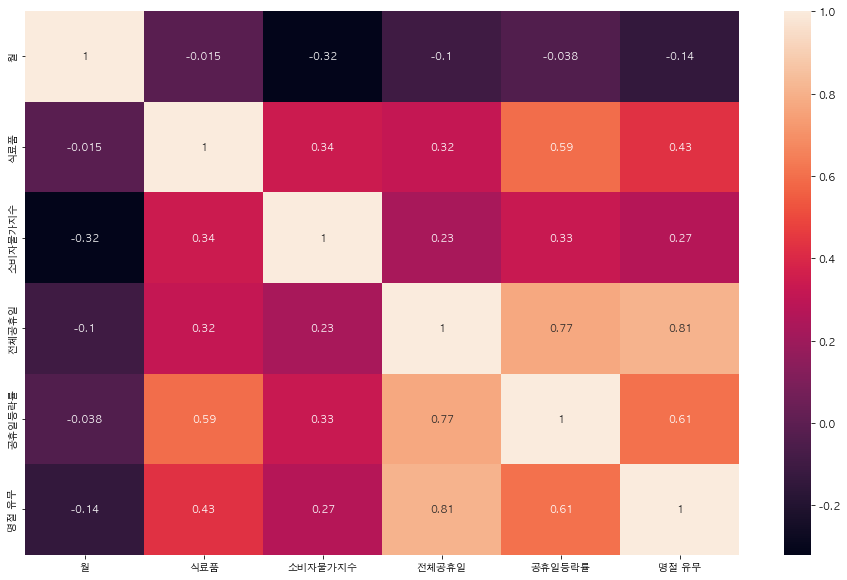

In [11]:
# 상관계수 히트맵

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(16,10))

sns.heatmap(food_df.corr(), annot=True)

plt.show()

In [12]:
food_df[["소비"]] = "" 
food_df

/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_50153/779574431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_df[["소비"]] = ""


,날짜,월,식료품,소비자물가지수,전체공휴일,공휴일등락률,명절 유무,소비
0,201001,1,-10.7,0.007900,1,0.0,0,
1,201002,2,22.1,0.002015,3,2.0,1,
2,201003,3,-14.4,0.002023,1,-2.0,0,
3,201004,4,-0.7,0.004026,0,-1.0,0,
4,201005,5,9.7,0.001011,2,2.0,0,
...,...,...,...,...,...,...,...,...
143,202112,12,2.7,0.001637,1,1.0,0,
144,202201,1,28.4,0.006248,1,0.0,0,
145,202202,2,-37.9,0.005827,3,2.0,1,
146,202203,3,11.4,0.007217,1,-2.0,0,


In [13]:
food_m = food_df.groupby('월').mean()
food_m

,식료품,소비자물가지수,전체공휴일,공휴일등락률,명절 유무
월,,,,,
1,11.976923,0.005726,1.923077,0.923077,0.307692
2,-8.523077,0.003762,2.076923,0.153846,0.692308
3,-2.607692,0.000658,1.000000,-1.076923,0.000000
4,1.461538,0.001152,0.000000,-1.000000,0.000000
5,11.625000,0.001094,1.916667,1.916667,0.000000
6,-9.600000,-0.000504,1.000000,-0.916667,0.000000
7,-0.725000,0.000503,0.000000,-1.000000,0.000000
8,8.158333,0.004418,1.000000,1.000000,0.000000
9,29.891667,0.003408,2.500000,1.500000,0.833333


In [14]:
for i in range(0, len(food_df)):
    for j in food_m.index[food_m['명절 유무'] > 0]:
        if food_df.loc[i, '월'] == j:
            food_df.loc[i, '소비'] = 1
    for j in food_m.index[food_m['명절 유무'] <= 0]:
        if food_df.loc[i, '월'] == j:
            food_df.loc[i, '소비'] = '-'


In [15]:
food_df[food_df['월'] == 1]

,날짜,월,식료품,소비자물가지수,전체공휴일,공휴일등락률,명절 유무,소비
0,201001,1,-10.7,0.007900,1,0.0,0,1
12,201101,1,10.9,0.011885,1,0.0,0,1
24,201201,1,25.4,0.003994,4,3.0,1,1
36,201301,1,2.6,0.005999,1,0.0,0,1
48,201401,1,30.2,0.005374,4,3.0,1,1
60,201501,1,0.9,0.006776,1,0.0,0,1
72,201601,1,4.5,0.001704,1,0.0,0,1
84,201701,1,29.7,0.010629,4,3.0,1,1
96,201801,1,-5.9,0.004176,1,0.0,0,1
108,201901,1,9.8,-0.001051,1,0.0,0,1


In [16]:
for i in range(0, len(food_df)):
    for j in food_m.index[food_m['명절 유무'] > 0]:
       if food_df.loc[i, '월'] == j: # 1, 2, 9, 10 명절이 있는 달
            if food_df.loc[i, '공휴일등락률'] > 0:
                if food_m['식료품'][food_m.index == food_df.loc[i,'월']].values > 0:
                    if food_df.loc[i, '식료품'] > 0:
                        if food_df.loc[i, '식료품'] > food_m['식료품'][food_m.index == food_df.loc[i,'월']].values:
                            food_df.loc[i, '소비'] = 1
                        elif food_df.loc[i, '식료품'] < food_m['식료품'][food_m.index == food_df.loc[i,'월']].values:
                            if food_df.loc[i, '소비자물가지수'] > 0:
                                food_df.loc[i, '소비'] = 1
                            elif food_df.loc[i, '소비자물가지수'] < 0:
                                if food_df.loc[i, '소비자물가지수'] > food_m['소비자물가지수'][food_m.index == food_df.loc[i,'월']].values:
                                    food_df.loc[i, '소비'] = 1
                                elif food_df.loc[i, '소비자물가지수'] < food_m['소비자물가지수'][food_m.index == food_df.loc[i,'월']].values:
                                    food_df.loc[i, '소비'] = 0
                    elif food_df.loc[i, '식료품'] < 0:
                        food_df.loc[i, '소비'] = 0
                elif food_m['식료품'][food_m.index == food_df.loc[i,'월']].values < 0:
                    if food_df.loc[i, '식료품'] > 0:
                        food_df.loc[i, '소비'] = 1
                    elif food_df.loc[i, '식료품'] < 0:
                        if food_df.loc[i, '식료품'] > food_m['식료품'][food_m.index == food_df.loc[i,'월']].values:
                            if food_df.loc[i, '소비자물가지수'] > 0:
                                if food_df.loc[i, '소비자물가지수'] > food_m['소비자물가지수'][food_m.index == food_df.loc[i,'월']].values:
                                    food_df.loc[i, '소비'] = 1
                                elif food_df.loc[i, '소비자물가지수'] > food_m['소비자물가지수'][food_m.index == food_df.loc[i,'월']].values:
                                    food_df.loc[i, '소비'] = 0
                            elif food_df.loc[i, '소비자물가지수'] < 0:
                                food_df.loc[i, '소비'] = 0
                        elif food_df.loc[i, '식료품'] < food_m['식료품'][food_m.index == food_df.loc[i,'월']].values:
                            food_df.loc[i, '소비'] = 0
            elif food_df.loc[i, '공휴일등락률'] <= 0:
                if food_m['식료품'][food_m.index == food_df.loc[i,'월']].values > 0:
                    if food_df.loc[i, '식료품'] > 0:
                        if food_df.loc[i, '식료품'] > food_m['식료품'][food_m.index == food_df.loc[i,'월']].values:
                            food_df.loc[i, '소비'] = 1
                        elif food_df.loc[i, '식료품'] < food_m['식료품'][food_m.index == food_df.loc[i,'월']].values:
                            if food_df.loc[i, '소비자물가지수'] > 0:
                                food_df.loc[i, '소비'] = 1
                            elif food_df.loc[i, '소비자물가지수'] < 0:
                                if food_df.loc[i, '소비자물가지수'] > food_m['소비자물가지수'][food_m.index == food_df.loc[i,'월']].values:
                                    food_df.loc[i, '소비'] = 1
                                elif food_df.loc[i, '소비자물가지수'] < food_m['소비자물가지수'][food_m.index == food_df.loc[i,'월']].values:
                                    food_df.loc[i, '소비'] = 0
                    elif food_df.loc[i, '식료품'] < 0:
                        food_df.loc[i, '소비'] = 0
                elif food_m['식료품'][food_m.index == food_df.loc[i,'월']].values < 0:
                    if food_df.loc[i, '식료품'] > 0:
                        food_df.loc[i, '소비'] = 1
                    elif food_df.loc[i, '식료품'] < 0:
                        if food_df.loc[i, '식료품'] > food_m['식료품'][food_m.index == food_df.loc[i,'월']].values:
                            if food_df.loc[i, '소비자물가지수'] > 0:
                                if food_df.loc[i, '소비자물가지수'] > food_m['소비자물가지수'][food_m.index == food_df.loc[i,'월']].values:
                                    food_df.loc[i, '소비'] = 1
                                elif food_df.loc[i, '소비자물가지수'] > food_m['소비자물가지수'][food_m.index == food_df.loc[i,'월']].values:
                                    food_df.loc[i, '소비'] = 0
                            elif food_df.loc[i, '소비자물가지수'] < 0:
                                food_df.loc[i, '소비'] = 0
                        elif food_df.loc[i, '식료품'] < food_m['식료품'][food_m.index == food_df.loc[i,'월']].values:
                            food_df.loc[i, '소비'] = 0
    for j in food_m.index[food_m['명절 유무'] <= 0]:
       if food_df.loc[i, '월'] == j: # 1, 2, 9, 10 명절이 있는 달
            if food_df.loc[i, '공휴일등락률'] > 0:
                if food_m['식료품'][food_m.index == food_df.loc[i,'월']].values > 0:
                    if food_df.loc[i, '식료품'] > 0:
                        if food_df.loc[i, '식료품'] > food_m['식료품'][food_m.index == food_df.loc[i,'월']].values:
                            food_df.loc[i, '소비'] = 1
                        elif food_df.loc[i, '식료품'] < food_m['식료품'][food_m.index == food_df.loc[i,'월']].values:
                            if food_df.loc[i, '소비자물가지수'] > 0:
                                food_df.loc[i, '소비'] = 1
                            elif food_df.loc[i, '소비자물가지수'] < 0:
                                if food_df.loc[i, '소비자물가지수'] > food_m['소비자물가지수'][food_m.index == food_df.loc[i,'월']].values:
                                    food_df.loc[i, '소비'] = 1
                                elif food_df.loc[i, '소비자물가지수'] < food_m['소비자물가지수'][food_m.index == food_df.loc[i,'월']].values:
                                    food_df.loc[i, '소비'] = 0
                    elif food_df.loc[i, '식료품'] < 0:
                        food_df.loc[i, '소비'] = 0
                elif food_m['식료품'][food_m.index == food_df.loc[i,'월']].values < 0:
                    if food_df.loc[i, '식료품'] > 0:
                        food_df.loc[i, '소비'] = 1
                    elif food_df.loc[i, '식료품'] < 0:
                        if food_df.loc[i, '식료품'] > food_m['식료품'][food_m.index == food_df.loc[i,'월']].values:
                            if food_df.loc[i, '소비자물가지수'] > 0:
                                if food_df.loc[i, '소비자물가지수'] > food_m['소비자물가지수'][food_m.index == food_df.loc[i,'월']].values:
                                    food_df.loc[i, '소비'] = 1
                                elif food_df.loc[i, '소비자물가지수'] > food_m['소비자물가지수'][food_m.index == food_df.loc[i,'월']].values:
                                    food_df.loc[i, '소비'] = 0
                            elif food_df.loc[i, '소비자물가지수'] < 0:
                                food_df.loc[i, '소비'] = 0
                        elif food_df.loc[i, '식료품'] < food_m['식료품'][food_m.index == food_df.loc[i,'월']].values:
                            food_df.loc[i, '소비'] = 0
            elif food_df.loc[i, '공휴일등락률'] <= 0:
                if food_m['식료품'][food_m.index == food_df.loc[i,'월']].values > 0:
                    if food_df.loc[i, '식료품'] > 0:
                        if food_df.loc[i, '식료품'] > food_m['식료품'][food_m.index == food_df.loc[i,'월']].values:
                            food_df.loc[i, '소비'] = 1
                        elif food_df.loc[i, '식료품'] < food_m['식료품'][food_m.index == food_df.loc[i,'월']].values:
                            if food_df.loc[i, '소비자물가지수'] > 0:
                                food_df.loc[i, '소비'] = 1
                            elif food_df.loc[i, '소비자물가지수'] < 0:
                                if food_df.loc[i, '소비자물가지수'] > food_m['소비자물가지수'][food_m.index == food_df.loc[i,'월']].values:
                                    food_df.loc[i, '소비'] = 1
                                elif food_df.loc[i, '소비자물가지수'] < food_m['소비자물가지수'][food_m.index == food_df.loc[i,'월']].values:
                                    food_df.loc[i, '소비'] = 0
                    elif food_df.loc[i, '식료품'] < 0:
                        food_df.loc[i, '소비'] = 0
                elif food_m['식료품'][food_m.index == food_df.loc[i,'월']].values < 0:
                    if food_df.loc[i, '식료품'] > 0:
                        food_df.loc[i, '소비'] = 1
                    elif food_df.loc[i, '식료품'] < 0:
                        if food_df.loc[i, '식료품'] > food_m['식료품'][food_m.index == food_df.loc[i,'월']].values:
                            if food_df.loc[i, '소비자물가지수'] > 0:
                                if food_df.loc[i, '소비자물가지수'] > food_m['소비자물가지수'][food_m.index == food_df.loc[i,'월']].values:
                                    food_df.loc[i, '소비'] = 1
                                elif food_df.loc[i, '소비자물가지수'] > food_m['소비자물가지수'][food_m.index == food_df.loc[i,'월']].values:
                                    food_df.loc[i, '소비'] = 0
                            elif food_df.loc[i, '소비자물가지수'] < 0:
                                food_df.loc[i, '소비'] = 0
                        elif food_df.loc[i, '식료품'] < food_m['식료품'][food_m.index == food_df.loc[i,'월']].values:
                            food_df.loc[i, '소비'] = 0

In [17]:
food_df[food_df['월'] == 10]

,날짜,월,식료품,소비자물가지수,전체공휴일,공휴일등락률,명절 유무,소비
9,201010,10,-24.8,0.000000,2,-1.0,0,0
21,201110,10,-21.5,-0.001898,2,-1.0,0,0
33,201210,10,-21.4,-0.001870,2,-1.0,0,0
45,201310,10,-24.4,-0.003051,2,-1.0,0,0
57,201410,10,-15.5,-0.003016,2,-1.0,0,0
69,201510,10,-28.9,0.000000,2,-1.0,0,0
81,201610,10,-12.5,0.001371,2,-1.0,0,1
93,201710,10,-2.9,-0.000968,5,5.0,1,0
105,201810,10,-29.9,-0.001796,2,-1.0,0,0
117,201910,10,-19.0,0.002475,2,-1.0,0,1


In [18]:
food_m

,식료품,소비자물가지수,전체공휴일,공휴일등락률,명절 유무
월,,,,,
1,11.976923,0.005726,1.923077,0.923077,0.307692
2,-8.523077,0.003762,2.076923,0.153846,0.692308
3,-2.607692,0.000658,1.000000,-1.076923,0.000000
4,1.461538,0.001152,0.000000,-1.000000,0.000000
5,11.625000,0.001094,1.916667,1.916667,0.000000
6,-9.600000,-0.000504,1.000000,-0.916667,0.000000
7,-0.725000,0.000503,0.000000,-1.000000,0.000000
8,8.158333,0.004418,1.000000,1.000000,0.000000
9,29.891667,0.003408,2.500000,1.500000,0.833333


In [19]:

import pandas as pd 

pd.set_option('display.max_rows', None)


In [20]:
food_df

,날짜,월,식료품,소비자물가지수,전체공휴일,공휴일등락률,명절 유무,소비
0,201001,1,-10.7,0.007900,1,0.0,0,0
1,201002,2,22.1,0.002015,3,2.0,1,1
2,201003,3,-14.4,0.002023,1,-2.0,0,0
3,201004,4,-0.7,0.004026,0,-1.0,0,0
4,201005,5,9.7,0.001011,2,2.0,0,1
5,201006,6,-8.3,-0.001010,1,-1.0,0,0
6,201007,7,2.5,0.002011,0,-1.0,0,1
7,201008,8,5.6,0.005022,1,1.0,0,1
8,201009,9,32.7,0.007963,3,2.0,1,1
9,201010,10,-24.8,0.000000,2,-1.0,0,0


In [21]:
food_df['소비'] = food_df['소비'].astype(int)

/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_50153/3073380363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_df['소비'] = food_df['소비'].astype(int)


In [22]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 147
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       148 non-null    object 
 1   월        148 non-null    int64  
 2   식료품      148 non-null    float64
 3   소비자물가지수  148 non-null    float64
 4   전체공휴일    148 non-null    int64  
 5   공휴일등락률   148 non-null    float64
 6   명절 유무    148 non-null    int64  
 7   소비       148 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 14.5+ KB


In [23]:
data = food_df[['날짜', '월', '식료품', '공휴일등락률', '전체공휴일','명절 유무']]
target = food_df['소비']

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [26]:
ss.fit(data)

StandardScaler()

In [27]:
data_scaled = ss.transform(data)

In [28]:
params = {'C' : [0, 0.1, 1, 10, 20]}

In [29]:
lr = LogisticRegression()
rg = Ridge()
ls = Lasso()
logisticreg = LogisticRegression()
detreec = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
xgb = XGBClassifier()

In [30]:
splitter = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
scores_logistic = cross_validate(lr, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_ridge = cross_validate(rg, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_lasso = cross_validate(ls, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_logisticreg = cross_validate(logisticreg, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_dectree = cross_validate(detreec, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_randomforest = cross_validate(randomforest, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
# scores_xgb = cross_validate(xgb, data, target, cv=splitter, n_jobs=-1, return_train_score=True)

In [31]:
print('로지스틱 train data score : ',np.mean(scores_logistic['train_score'])) 
print('로지스틱 test data score : ',np.mean(scores_logistic['test_score']))  
print('릿지 train data score : ',np.mean(scores_ridge['train_score'])) 
print('릿지 test data score : ',np.mean(scores_ridge['test_score']))  
print('라쏘 train data score : ', np.mean(scores_lasso['train_score'])) 
print('라쏘 test data score : ', np.mean(scores_lasso['test_score'])) 
print('결정트리(Decision Tree) train data score : ',np.mean(scores_dectree['train_score']))
print('결정트리(Decision Tree) test data score : ',np.mean(scores_dectree['test_score']))
print('랜덤포레스트 train data score : ',np.mean(scores_randomforest['train_score']))
print('랜덤포레스트 test data score : ',np.mean(scores_randomforest['test_score']))
# print('XGB train data score : ',np.mean(scores_xgb['train_score']))
# print('XGB test data score : ',np.mean(scores_xgb['test_score']))

로지스틱 train data score :  0.8905717282979282
로지스틱 test data score :  0.8925
릿지 train data score :  0.519461675900695
릿지 test data score :  0.4533696138341943
라쏘 train data score :  0.44392117205403836
라쏘 test data score :  0.4328633494134178
결정트리(Decision Tree) train data score :  1.0
결정트리(Decision Tree) test data score :  0.8788888888888889
랜덤포레스트 train data score :  1.0
랜덤포레스트 test data score :  0.8991666666666666


In [32]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state=9)

In [33]:
df_clf = DecisionTreeClassifier()


In [34]:
df_clf.fit(X_train, y_train)



DecisionTreeClassifier()

In [35]:

X_pred = df_clf.predict(X_test)

 

In [36]:

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, X_pred)))

예측 정확도: 0.8889


<function matplotlib.pyplot.show(close=None, block=None)>

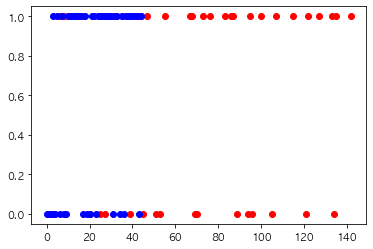

In [37]:
plt.plot(y_test, 'o',c='red')
plt.plot(X_pred, 'o',c='blue')
plt.show

In [38]:
food_df.columns

Index(['날짜', '월', '식료품', '소비자물가지수', '전체공휴일', '공휴일등락률', '명절 유무', '소비'], dtype='object')

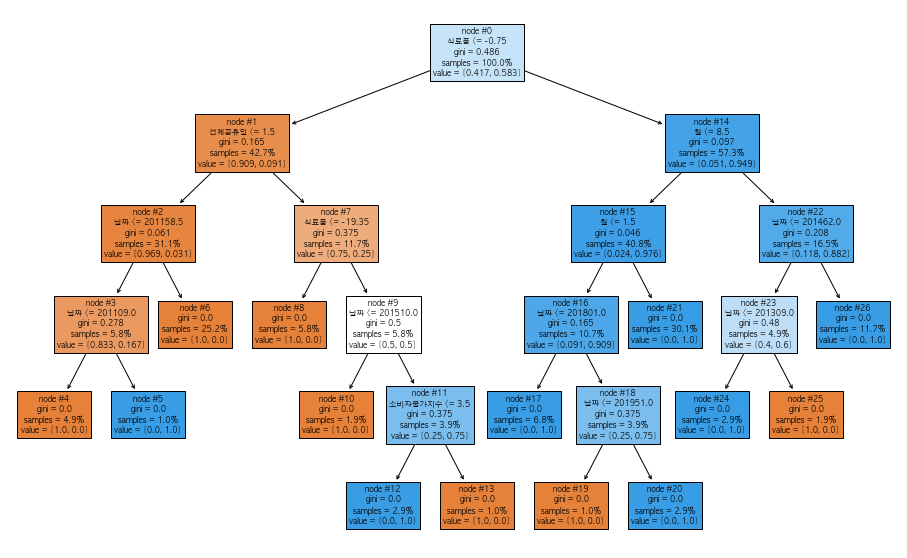

In [39]:
from sklearn.tree import plot_tree
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

feature_names = ['날짜', '월', '식료품', '소비자물가지수', '전체공휴일', '공휴일등락률', '명절 유무']

plt.figure(figsize=(16,10))
plot_tree(df_clf, filled=True, feature_names=feature_names, node_ids=True, proportion=True)
plt.show()

In [40]:
df_clf.feature_importances_


array([0.17536136, 0.00693297, 0.77109163, 0.02994186, 0.01667217,
       0.        ])

<AxesSubplot:title={'center':'피처중요도'}>

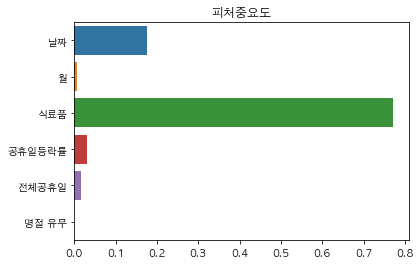

In [41]:
# 피처 중요도 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

plt.title("피처중요도")
sns.barplot(x=df_clf.feature_importances_, y=data.columns)

In [42]:
# **머신러닝**:

# - Decision Tree
# - Random Forest
# - XGBoost

In [43]:
## 80대 20으로
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=61)


In [44]:
#다른 라이브러리로 비교해보는 것도 좋을 듯

from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

be_clf = RandomForestClassifier()
be_clf.fit(X_train, y_train)

pred = be_clf.predict(X_test)

print(f'정확도 : {accuracy_score(y_test, pred)}')
print(f'정밀도 TP/(FP+TP) : {precision_score(y_test, pred)}')
print(f'재현율 TP/(FN+TP) : {recall_score(y_test, pred)}')
## precision과 recall은 상충관계에 있었다? trade off관계?

## 왜 실행떄마다 값이 바뀔까

정확도 : 0.9
정밀도 TP/(FP+TP) : 0.8888888888888888
재현율 TP/(FN+TP) : 0.9411764705882353


In [45]:
from sklearn.metrics import f1_score

print(f'f1 score : {f1_score(y_test, pred)}')


f1 score : 0.9142857142857143


In [46]:
import numpy as np
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

pred_proba = lr_clf.predict_proba(X_test) ## 확률값 리턴 위해
pred = lr_clf.predict(X_test)

#print(pred)
#print(pred_proba) ## 타이타닉 경우의 수 2 생,사
#print(f'shape : {pred_proba.shape}')

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print("두 개의 class중 더 큰 확률을 클래스 값으로 예측 \n", pred_proba_result[:3])


두 개의 class중 더 큰 확률을 클래스 값으로 예측 
 [[0.12440788 0.87559212 1.        ]
 [0.35805783 0.64194217 1.        ]
 [0.62438867 0.37561133 0.        ]]


In [47]:
from sklearn.metrics import precision_recall_curve
#레이블 값이 1일때의 예측 확률
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

#실제 데이터 셋과 레이블 값이 1일때 예측확률을 커브 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print("반환 분류 결정 임계값 배열의 Shape : ", thresholds.shape)
print("반환된 precisions 배열의 shape : ", precisions.shape)
print("q반환된 recalls 배열의 shape : ", recalls.shape)

print("thresholds 5sample : ", thresholds[:5])
print("precisions 5sample : ", precisions[:5])
print("recalls 5sample : ", recalls[:5])

#반환된 임계값 배열 로우가 147건이니까 샘플로 10건, 임계값을 15step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print("샘플 추출 위한 임계값 배열의 index 10개 : ", thr_index)
print("샘플용 10개의 임계값 : ", np.round(thresholds[thr_index], 2))

#15step 단위로 추출된 이계값에 따른 정밀도와 재현율 값
print("샘플 임계값별 정밀도 : ", np.round(precisions[thr_index], 3))
print("샘플 임계값별 재현율 : ", np.round(recalls[thr_index], 3))



반환 분류 결정 임계값 배열의 Shape :  (30,)
반환된 precisions 배열의 shape :  (31,)
q반환된 recalls 배열의 shape :  (31,)
thresholds 5sample :  [0.00054658 0.00062992 0.01223603 0.01598549 0.05155947]
precisions 5sample :  [0.56666667 0.5862069  0.60714286 0.62962963 0.65384615]
recalls 5sample :  [1. 1. 1. 1. 1.]
샘플 추출 위한 임계값 배열의 index 10개 :  [ 0 15]
샘플용 10개의 임계값 :  [0.  0.7]
샘플 임계값별 정밀도 :  [0.567 0.933]
샘플 임계값별 재현율 :  [1.    0.824]


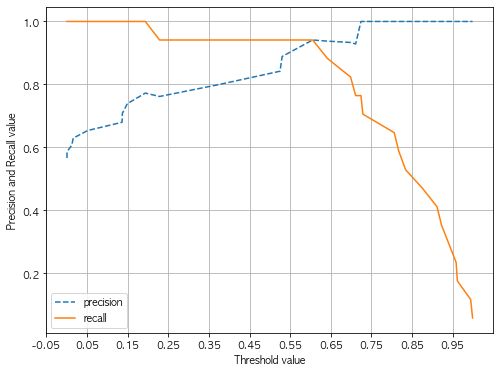

In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #x축을 threshold값으로 y축은 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    #threshold 값 x축의 scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    #x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

    
    
    

In [49]:
food_df['날짜'] = food_df['날짜'].astype(int)
data = food_df[['날짜', '월', '식료품', '소비자물가지수', '전체공휴일', '공휴일등락률', '명절 유무']]
target = food_df['소비']


/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_50153/316614879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_df['날짜'] = food_df['날짜'].astype(int)


In [50]:
#XGBoosting 따로 install해야
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=13)


In [51]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 147
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       148 non-null    int64  
 1   월        148 non-null    int64  
 2   식료품      148 non-null    float64
 3   소비자물가지수  148 non-null    float64
 4   전체공휴일    148 non-null    int64  
 5   공휴일등락률   148 non-null    float64
 6   명절 유무    148 non-null    int64  
 7   소비       148 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 14.5 KB


In [52]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Extreme Gradient Boosting (xgboost) 모델 사용

# 1. 모델 선언
xgb  = XGBClassifier()

# 2. 모델 훈련 fit()함수
xgb.fit(X_train, y_train)

# 3. 모델 예측 predict()함수
y_pred = xgb.predict(X_test)

# 4. score()
#xgb.score(X_train, y_train)
acc = accuracy_score(y_pred, y_test)
print(acc)

## 병렬처리 연산이라 속도가 빠름

0.9666666666666667


<function matplotlib.pyplot.show(close=None, block=None)>

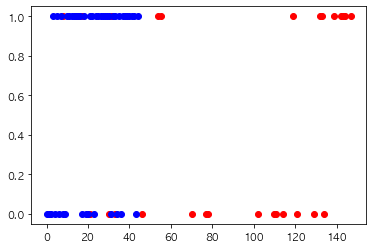

In [53]:
plt.plot(y_test, 'o',c='red')
plt.plot(X_pred, 'o',c='blue')
plt.show

In [54]:
food_train = food_df[0:-13]
food_test = food_df[-13:-1]
food_train

,날짜,월,식료품,소비자물가지수,전체공휴일,공휴일등락률,명절 유무,소비
0,201001,1,-10.7,0.007900,1,0.0,0,0
1,201002,2,22.1,0.002015,3,2.0,1,1
2,201003,3,-14.4,0.002023,1,-2.0,0,0
3,201004,4,-0.7,0.004026,0,-1.0,0,0
4,201005,5,9.7,0.001011,2,2.0,0,1
5,201006,6,-8.3,-0.001010,1,-1.0,0,0
6,201007,7,2.5,0.002011,0,-1.0,0,1
7,201008,8,5.6,0.005022,1,1.0,0,1
8,201009,9,32.7,0.007963,3,2.0,1,1
9,201010,10,-24.8,0.000000,2,-1.0,0,0


In [55]:
food_x_train = food_train[['날짜', '월', '식료품', '소비자물가지수', '전체공휴일', '공휴일등락률', '명절 유무']]
food_y_train = food_train['소비']
food_x_test = food_test[['날짜', '월', '식료품', '소비자물가지수', '전체공휴일', '공휴일등락률', '명절 유무']]
food_y_test = food_test['소비']


In [56]:
X_train = food_x_train
X_test = food_x_test
y_train = food_y_train
y_test = food_y_test


In [57]:
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

be_clf = RandomForestClassifier()
be_clf.fit(X_train, y_train)

pred = be_clf.predict(X_test)

print(f'정확도 : {accuracy_score(y_test, pred)}')

정확도 : 0.9166666666666666


In [58]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Extreme Gradient Boosting (xgboost) 모델 사용

# 1. 모델 선언
xgb  = XGBClassifier()

# 2. 모델 훈련 fit()함수
xgb.fit(X_train, y_train)

# 3. 모델 예측 predict()함수
y_pred = xgb.predict(X_test)

# 4. score()
#xgb.score(X_train, y_train)
acc = accuracy_score(y_pred, y_test)
print(acc)

## 병렬처리 연산이라 속도가 빠름

0.9166666666666666


In [59]:
df_clf = DecisionTreeClassifier(random_state=11)
df_clf.fit(X_train, y_train)
X_pred = df_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, X_pred)))

예측 정확도: 0.9167


In [61]:
food_df.to_csv('./data/food.csv', index=0)